<a href="https://colab.research.google.com/github/SachinGuria47/Analyzing-Price-Trends-and-Inflation-Patterns-in-India-s-Consumer-Price-Index--Rural-and-Urban--up-t/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# #Analyzing Price Trends and Inflation Patterns in India's Consumer Price Index (Rural and Urban) up to February 2024


In [5]:
#import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("cleaned_cpi.csv")
df.info()  #checking the datatypes and value counts in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               393 non-null    object 
 1   Year                                 393 non-null    int64  
 2   Month                                393 non-null    object 
 3   Cereals and products                 393 non-null    float64
 4   Meat and fish                        393 non-null    float64
 5   Egg                                  393 non-null    float64
 6   Milk and products                    393 non-null    float64
 7   Oils and fats                        393 non-null    float64
 8   Fruits                               393 non-null    float64
 9   Vegetables                           393 non-null    float64
 10  Pulses and products                  393 non-null    float64
 11  Sugar and Confectionery         

## Descriptive Analysis 👇

In [7]:
df.describe()

,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,2018.053435,139.733079,160.445038,144.115522,143.052926,134.073791,143.211705,159.657761,145.218575,112.019593,...,141.705598,139.549109,139.454198,141.870229,129.861832,136.623664,143.949618,137.017557,137.246056,142.690076
std,3.252894,18.604015,35.706008,25.265470,20.618542,29.927671,19.121444,31.762973,27.307429,9.735908,...,18.413889,24.402223,21.282900,26.235997,21.013882,21.886996,22.957651,26.113081,22.959295,22.796941
min,2013.000000,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,...,100.300000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,2015.000000,124.600000,131.300000,123.300000,128.700000,111.100000,131.100000,136.600000,121.000000,103.900000,...,130.500000,118.000000,122.000000,119.500000,112.000000,118.100000,125.700000,113.300000,117.200000,124.200000
50%,2018.000000,136.800000,146.600000,137.300000,141.700000,121.100000,142.700000,155.400000,142.100000,113.800000,...,141.700000,135.300000,137.400000,136.200000,121.200000,132.600000,144.000000,129.900000,132.200000,138.600000
75%,2021.000000,148.200000,198.700000,169.200000,156.200000,159.200000,155.700000,178.100000,165.400000,119.700000,...,153.000000,159.400000,154.700000,164.200000,150.500000,155.100000,161.900000,159.300000,157.000000,161.100000
max,2024.000000,188.600000,226.600000,206.100000,183.200000,209.900000,186.700000,295.300000,210.100000,131.400000,...,178.500000,187.400000,183.300000,193.800000,172.200000,177.400000,186.000000,190.100000,183.800000,188.200000


### Distribution of the numerical features


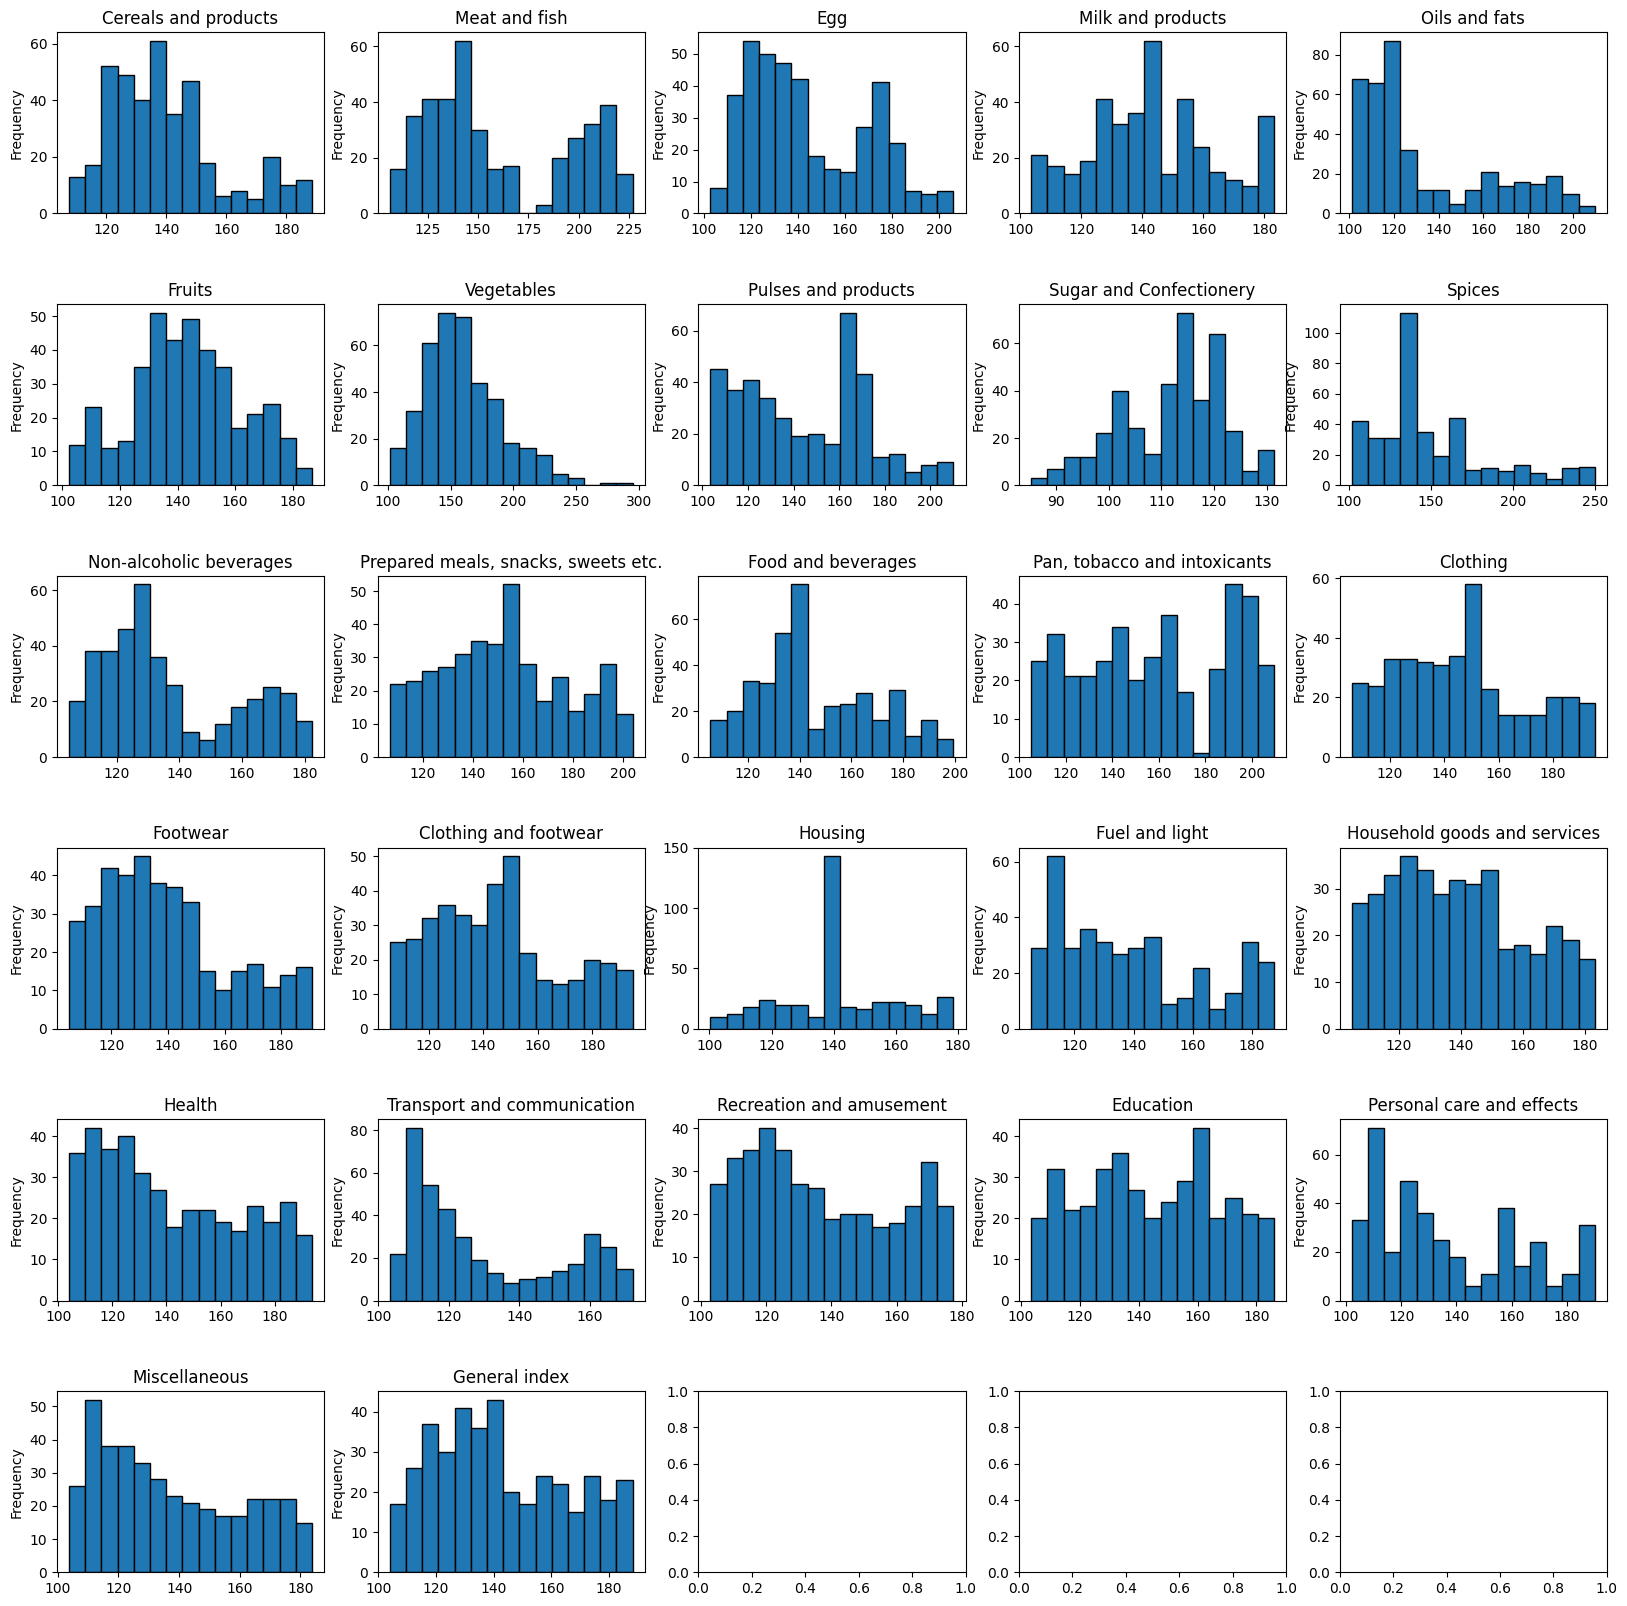

In [30]:
num_col = df.select_dtypes(include=np.number).columns.tolist() # to filter out only the columns that contain numerical data types
num_col.remove('Year')
fig,axes = plt.subplots(6,5,figsize=(20,20)) #6 rows and 5 columns
axes = axes.flatten()
for i, col in enumerate(num_col):
    df[col].plot(kind='hist',bins=15, ax=axes[i], edgecolor='black', title=col)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Boxplot for identifying outliers




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

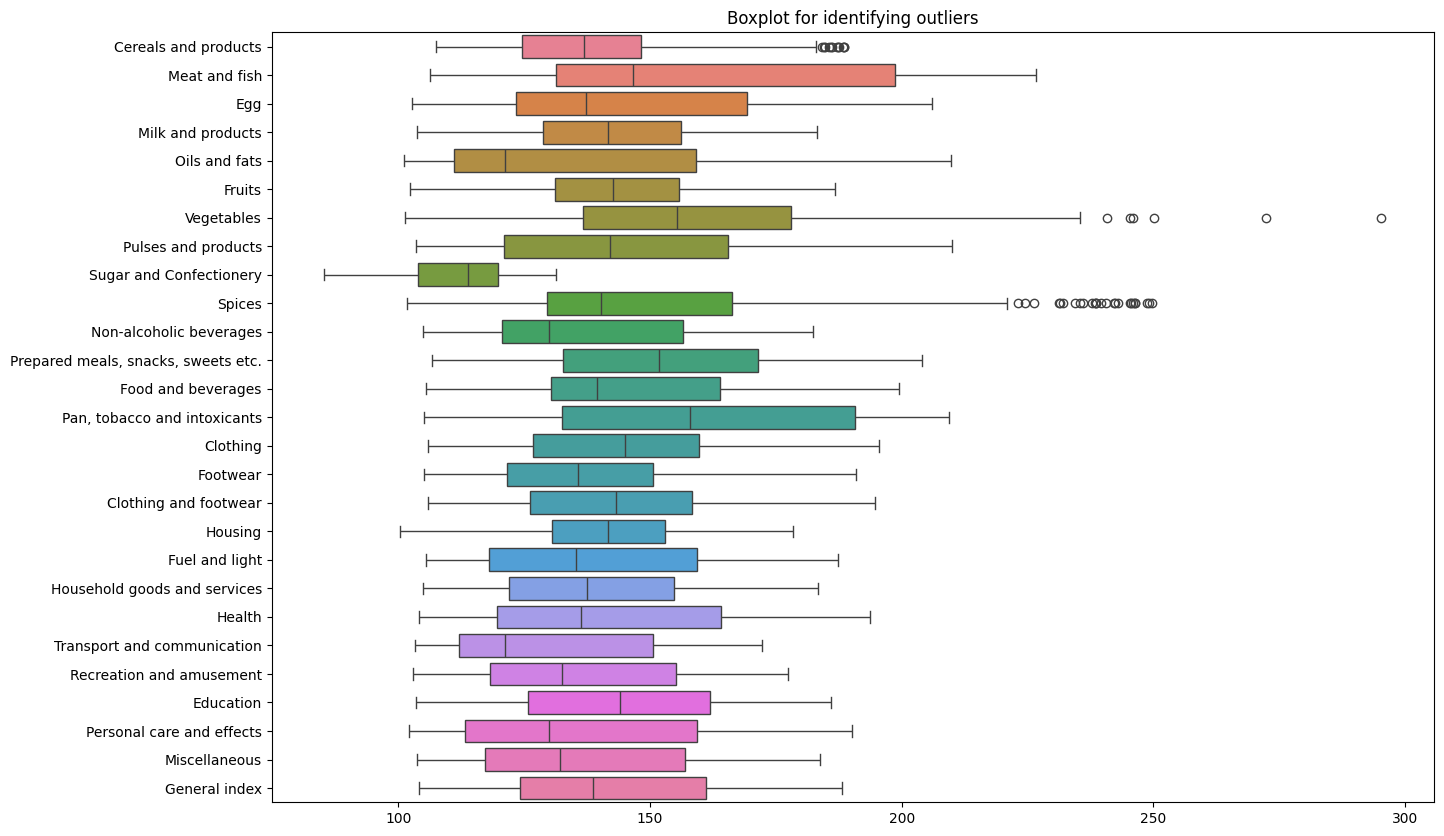

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_col],orient='h')
plt.xticks(rotation=0)
plt.title('Boxplot for identifying outliers')
plt.show()